In [2]:
print("hello wolrd")

hello wolrd


In [3]:
## crei um exemplo com graphviz

from graphviz import Digraph

dot = Digraph()

dot.node('A', 'Root')
dot.node('B', 'Left Child')
dot.node('C', 'Right Child')
dot.node('D', 'Left Grandchild')
dot.node('E', 'Right Grandchild')

dot.edges(['AB', 'AC'])
dot.edge('B', 'D')
dot.edge('B', 'E')

dot.render('tree_example', format='png', cleanup=True)


'tree_example.png'

Valor 120 não encontrado na árvore.


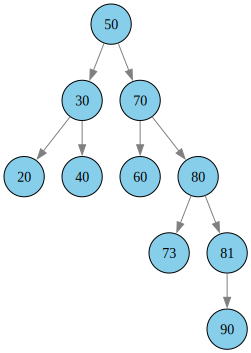

In [29]:
# ==============================================================================
# PASSO 1: INSTALAÇÃO DAS DEPENDÊNCIAS (execute esta célula primeiro)
# ==============================================================================
#!apt-get install -y graphviz
#!pip install graphviz

# ==============================================================================
# PASSO 2: CÓDIGO DA ÁRVORE COM VISUALIZAÇÃO GRAPHVIZ
# ==============================================================================
import graphviz

class Node:
    """
    Classe para representar um nó em uma Árvore Binária de Busca.
    """
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

class BinarySearchTree:
    """
    Classe que implementa a Árvore Binária de Busca e suas operações.
    """
    def __init__(self):
        self.root = None

    # --- INSERÇÃO (sem alterações) ---
    def insert(self, key):
        if self.root is None:
            self.root = Node(key)
        else:
            self._insert_recursive(self.root, key)

    def _insert_recursive(self, current_node, key):
        if key < current_node.key:
            if current_node.left is None:
                current_node.left = Node(key)
            else:
                self._insert_recursive(current_node.left, key)
        elif key > current_node.key:
            if current_node.right is None:
                current_node.right = Node(key)
            else:
                self._insert_recursive(current_node.right, key)

    # --- BUSCA (sem alterações) ---
    def search(self, key):
        value = self._search_recursive(self.root, key)

        if value is not None:
            print(f"Valor {key} encontrado na árvore.")

        else:
            print(f"Valor {key} não encontrado na árvore.")

        return value

    def _search_recursive(self, current_node, key):
        if current_node is None or current_node.key == key:
            return current_node
        if key < current_node.key:
            return self._search_recursive(current_node.left, key)
        else:
            return self._search_recursive(current_node.right, key)

    ## deletar nos da alvore
    def delete(self, key):
        self.root = self._delete_recursive(self.root, key)

    def _delete_recursive(self, node, key):
        if node is None:
            return node
        
        if key < node.key:
            node.left = self._delete_recursive(node.left, key)
        elif key > node.key:
            node.right = self._delete_recursive(node.right, key)
        else:
            # Nó com apenas um filho ou nenhum filho
            if node.left is None:
                return node.right
            elif node.right is None:
                return node.left
            
            # Nó com dois filhos: obter o sucessor inorder (menor na subárvore direita)
            menorvalor = self._min_value_node(node.right)

            node.key = menorvalor.key  # Copiar o valor do sucessor inorder
            node.right = self._delete_recursive(node.right, menorvalor.key)

        return node
    
    def _min_value_node(self, node):
        current = node
        while current.left is not None:
            current = current.left
        return current
       
        
    # --- VISUALIZAÇÃO COM GRAPHVIZ (MÉTODO ALTERADO) ---
    def visualize(self):
        """
        Cria uma representação visual da árvore usando Graphviz e a retorna.
        """
        if self.root is None:
            print("A árvore está vazia.")
            return None

        dot = graphviz.Digraph(comment='Árvore Binária de Busca')
        dot.attr('node', shape='circle', style='filled', fillcolor='skyblue', fontcolor='black')
        dot.attr('edge', color='gray')
        
        def add_nodes_edges(node):
            """Função auxiliar para adicionar nós e arestas recursivamente."""
            if node is not None:
                # Adiciona o nó atual
                dot.node(str(id(node)), str(node.key))
                
                # Adiciona o filho da esquerda e a aresta
                if node.left:
                    dot.node(str(id(node.left)), str(node.left.key))
                    dot.edge(str(id(node)), str(id(node.left)))
                    add_nodes_edges(node.left)
                
                # Adiciona o filho da direita e a aresta
                if node.right:
                    dot.node(str(id(node.right)), str(node.right.key))
                    dot.edge(str(id(node)), str(id(node.right)))
                    add_nodes_edges(node.right)

        add_nodes_edges(self.root)
        return dot

# --- Seção de Exemplo de Uso (AJUSTADA) ---
if __name__ == "__main__":
    bst = BinarySearchTree()

    # Inserindo valores
    #print("--- Inserindo nós na árvore: 50, 30, 70, 20, 40, 60, 80 ---")
    keys_to_insert = [50, 30, 70, 20, 40, 60, 80, 81, 73, 90]
    
    #gere numeros aleatórios
    # import random
    # keys_to_insert = random.sample(range(1, 101), 50)
    # print("Chaves inseridas:", keys_to_insert)
    
    for key in keys_to_insert:
        bst.insert(key)

    #bst.delete(70)

    bst.search(120)

    display(bst.visualize()) # Exibe a árvore final
    

In [ ]:
import re

class Node:
    """
    Representa um nó na árvore de expressão.
    Pode ser um operador (+, -, *, /) ou um operando (número/variável).
    """
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

    def __repr__(self):
        return f"Node({self.value})"

def build_expression_tree(expression: str):
    """
    Constrói uma árvore de expressão a partir de uma string aritmética.
    Utiliza duas pilhas: uma para valores (nós) e uma para operadores.
    """
    # Define a precedência dos operadores
    precedence = {'+': 1, '-': 1, '*': 2, '×': 2, '/': 2}
    
    # Pilhas
    values_stack = []  # Para armazenar nós da árvore (operandos)
    ops_stack = []     # Para armazenar operadores e parênteses

    def apply_op():
        """
        Pega um operador da pilha de operadores, dois operandos da pilha de valores,
        cria um novo nó e o empilha de volta na pilha de valores.
        """
        operator = ops_stack.pop()
        right = values_stack.pop()
        left = values_stack.pop()
        
        new_node = Node(operator)
        new_node.left = left
        new_node.right = right
        values_stack.append(new_node)

    # Tokeniza a expressão: separa números, variáveis e operadores.
    # Ex: "(2*(a-1))" -> ['(', '2', '*', '(', 'a', '-', '1', ')', ')']
    tokens = re.findall(r'(\d+\.?\d*|[a-zA-Z]+|[+\-×*/()])', expression.replace(" ", ""))

    for token in tokens:
        # Se for um número ou variável, cria um nó e o coloca na pilha de valores.
        if token.isalnum() or (token.replace('.', '', 1).isdigit()):
            values_stack.append(Node(token))
            
        # Se for um parêntese de abertura, coloca na pilha de operadores.
        elif token == '(':
            ops_stack.append(token)
            
        # Se for um parêntese de fechamento, resolve toda a expressão dentro dele.
        elif token == ')':
            while ops_stack and ops_stack[-1] != '(':
                apply_op()
            ops_stack.pop()  # Remove o '('
            
        # Se for um operador.
        else:
            # Enquanto o topo da pilha de operadores tiver maior ou igual precedência,
            # aplica a operação.
            while (ops_stack and ops_stack[-1] != '(' and
                   precedence.get(ops_stack[-1], 0) >= precedence.get(token, 0)):
                apply_op()
            ops_stack.append(token)

    # A expressão acabou, mas podem ter sobrado operadores na pilha.
    while ops_stack:
        apply_op()

    # No final, a pilha de valores terá apenas um elemento: a raiz da árvore.
    return values_stack[0]

def inorder_traversal(node: Node):
    """
    Realiza a travessia in-order na árvore e imprime a expressão.
    Adiciona parênteses para manter a ordem correta.
    """
    if node is not None:
        # Se o filho da esquerda for um operador, coloca parênteses
        if node.left is not None and node.left.left is not None:
            print("(", end="")
        inorder_traversal(node.left)
        if node.left is not None and node.left.left is not None:
             print(")", end="")

        # Imprime o valor do nó (operador ou operando)
        print(f" {node.value} ", end="")
        
        # Se o filho da direita for um operador, coloca parênteses
        if node.right is not None and node.right.left is not None:
            print("(", end="")
        inorder_traversal(node.right)
        if node.right is not None and node.right.left is not None:
            print(")", end="")


# --- Exemplo de Uso ---
expression = "(2 × (a - 1) + (3 × b))"

print(f"Expressão Original: {expression}\n")

# 1. Construir a árvore a partir da expressão
root = build_expression_tree(expression)

# 2. Fazer o print usando a travessia In-Order
print("Travessia In-Order (recupera a expressão):")
# Adicionamos parênteses externos para a expressão completa
print("(", end="")
inorder_traversal(root)
print(")")

In [6]:
# -*- coding: utf-8 -*-
# É necessário instalar as bibliotecas matplotlib e networkx para a visualização.
# Você pode instalá-las com o comando: pip install matplotlib networkx
import matplotlib.pyplot as plt
import networkx as nx

class Node:
    """
    Classe para representar um nó em uma Árvore Binária de Busca.
    Cada nó armazena uma chave e referências para os filhos da esquerda e da direita.
    """
    def __init__(self, key):
        self.key = key  # A chave (valor) do nó
        self.left = None  # Ponteiro para o filho da esquerda (valores menores)
        self.right = None # Ponteiro para o filho da direita (valores maiores)

class BinarySearchTree:
    """
    Classe que implementa a Árvore Binária de Busca e suas operações.
    """
    def __init__(self):
        self.root = None  # A raiz da árvore, inicialmente vazia

    # --- INSERÇÃO ---
    def insert(self, key):
        """Método público para inserir uma nova chave na árvore."""
        if self.root is None:
            self.root = Node(key)
        else:
            self._insert_recursive(self.root, key)

    def _insert_recursive(self, current_node, key):
        """Método privado e recursivo para encontrar o local e inserir um novo nó."""
        if key < current_node.key:
            # Vai para a subárvore esquerda
            if current_node.left is None:
                current_node.left = Node(key)
            else:
                self._insert_recursive(current_node.left, key)
        elif key > current_node.key:
            # Vai para a subárvore direita
            if current_node.right is None:
                current_node.right = Node(key)
            else:
                self._insert_recursive(current_node.right, key)
        # Se a chave já existe, não fazemos nada (poderia ser adaptado para permitir duplicatas)

    # --- BUSCA ---
    def search(self, key):
        """Método público para buscar uma chave na árvore. Retorna o nó se encontrado, senão None."""
        return self._search_recursive(self.root, key)

    def _search_recursive(self, current_node, key):
        """Método privado e recursivo para buscar uma chave."""
        # Caso base: nó atual é nulo (chave não encontrada) ou a chave foi encontrada
        if current_node is None or current_node.key == key:
            return current_node

        # Navega para a esquerda ou direita com base na propriedade da BST
        if key < current_node.key:
            return self._search_recursive(current_node.left, key)
        else:
            return self._search_recursive(current_node.right, key)

    # --- REMOÇÃO ---
    def delete(self, key):
        """Método público para remover uma chave da árvore."""
        self.root = self._delete_recursive(self.root, key)

    def _delete_recursive(self, current_node, key):
        """Método privado e recursivo para encontrar e remover um nó."""
        if current_node is None:
            return current_node # Chave não encontrada, não faz nada

        # Encontra o nó a ser removido
        if key < current_node.key:
            current_node.left = self._delete_recursive(current_node.left, key)
        elif key > current_node.key:
            current_node.right = self._delete_recursive(current_node.right, key)
        else:
            # O nó foi encontrado. Agora, lida com os 3 casos de remoção:
            # Caso 1: Nó a ser removido é uma folha (não tem filhos)
            if current_node.left is None and current_node.right is None:
                return None
            # Caso 2: Nó a ser removido tem apenas um filho
            elif current_node.left is None:
                return current_node.right
            elif current_node.right is None:
                return current_node.left
            # Caso 3: Nó a ser removido tem dois filhos
            else:
                # Encontra o sucessor in-order (o menor valor na subárvore direita)
                successor_node = self._find_min_value_node(current_node.right)
                # Copia a chave do sucessor para este nó
                current_node.key = successor_node.key
                # Remove o sucessor da subárvore direita
                current_node.right = self._delete_recursive(current_node.right, successor_node.key)

        return current_node

    def _find_min_value_node(self, node):
        """Encontra o nó com o menor valor em uma subárvore (sempre o mais à esquerda)."""
        current = node
        while current.left is not None:
            current = current.left
        return current

    # --- VISUALIZAÇÃO (BÔNUS) ---
    def draw_tree(self, filename="bst_visualization.png"):
        """Usa matplotlib e networkx para desenhar a árvore."""
        if self.root is None:
            print("A árvore está vazia.")
            return

        graph = nx.DiGraph()
        labels = {}

        def add_edges(node):
            if node is not None:
                labels[node.key] = str(node.key)
                if node.left is not None:
                    graph.add_edge(node.key, node.left.key)
                    add_edges(node.left)
                if node.right is not None:
                    graph.add_edge(node.key, node.right.key)
                    add_edges(node.right)

        add_edges(self.root)

        # Tenta criar um layout hierárquico (requer graphviz)
        try:
            pos = nx.drawing.nx_pydot.graphviz_layout(graph, prog='dot')
        except ImportError:
            # Fallback para um layout padrão se graphviz não estiver instalado
            print("Graphviz não encontrado, usando layout padrão.")
            pos = nx.spring_layout(graph)

        plt.figure(figsize=(12, 8))
        nx.draw(graph, pos, labels=labels, with_labels=True, arrows=False, node_size=2500, node_color='skyblue', font_size=12, font_weight='bold', edge_color='gray')
        plt.title("Visualização da Árvore Binária de Busca")
        plt.savefig(filename)
        print(f"A imagem da árvore foi salva como '{filename}'")
        plt.close()


# --- Seção de Exemplo de Uso ---
if __name__ == "__main__":
    bst = BinarySearchTree()

    # Inserindo valores
    print("--- Inserindo nós na árvore: 50, 30, 70, 20, 40, 60, 80 ---")
    keys_to_insert = [1, 2, 20, 50, 30, 70, 20, 40, 80]
    for key in keys_to_insert:
        bst.insert(key)

    # Visualizando a árvore após inserções
    bst.draw_tree("bst_inicial.png")

    # Buscando valores
    print("\n--- Buscando nós ---")
    search_key = 40
    result = bst.search(search_key)
    if result:
        print(f"Chave {search_key} encontrada na árvore.")
    else:
        print(f"Chave {search_key} NÃO encontrada na árvore.")

    search_key = 90
    result = bst.search(search_key)
    if result:
        print(f"Chave {search_key} encontrada na árvore.")
    else:
        print(f"Chave {search_key} NÃO encontrada na árvore.")

    # Removendo um nó (folha)
    print("\n--- Removendo o nó 20 (uma folha) ---")
    bst.delete(2)

    # Removendo um nó com dois filhos
    print("--- Removendo o nó 70 (com dois filhos) ---")
    bst.delete(70)
    bst.delete(1)


    # Removendo a raiz
    print("--- Removendo o nó 50 (a raiz) ---")
    bst.delete(50)

    print("\nVisualizando a árvore após as remoções...")
    bst.draw_tree("bst_final.png")

    print(f"\nA nova raiz da árvore é: {bst.root.key if bst.root else 'Nenhuma'}")

--- Inserindo nós na árvore: 50, 30, 70, 20, 40, 60, 80 ---
Graphviz não encontrado, usando layout padrão.
A imagem da árvore foi salva como 'bst_inicial.png'

--- Buscando nós ---
Chave 40 encontrada na árvore.
Chave 90 NÃO encontrada na árvore.

--- Removendo o nó 20 (uma folha) ---
--- Removendo o nó 70 (com dois filhos) ---
--- Removendo o nó 50 (a raiz) ---

Visualizando a árvore após as remoções...
Graphviz não encontrado, usando layout padrão.
A imagem da árvore foi salva como 'bst_final.png'

A nova raiz da árvore é: 20
